<div style="text-align: center;">
    <h1 style="font-size:26px;">PREPARACIÓN DE LOS DATOS</h1>
</d>

In [2]:
import pandas as pd  # Para manejar los datos
from sklearn.preprocessing import LabelEncoder #Convertir las etiquetas categóricas
import matplotlib.pyplot as plt  # Para gráficos
import seaborn as sns
import warnings #Elimina mensajes de alerta
warnings.simplefilter("ignore")

#### REALIZAMOS LA LECTURA DE NUESTRA DATOS DE MAQUINARIA INDUSTRIAL

In [3]:
base = pd.read_csv('MAQUINAS_2.csv', delimiter=',')
base.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Fallo por desgaste de la herramienta (TWF),Fallo por disipacion de calor (HDF),Fallo de potencia (PWF),Fallo por sobredeformación (OSF),Fallos aleatorios (RNF),Machine Failure
0,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#### ELIMINAMOS DE COLUMNNAS

In [4]:
# Eliminar la columna 'Product ID' "Fallos aleatorios (RNF)" y el del DataFrame
base = base.drop(columns=['Product ID'])

# Verificar las primeras filas para confirmar que la columna ha sido eliminada
base.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Fallo por desgaste de la herramienta (TWF),Fallo por disipacion de calor (HDF),Fallo de potencia (PWF),Fallo por sobredeformación (OSF),Fallos aleatorios (RNF),Machine Failure
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


#### APLICAMOS TRANSFORMACIONES

In [5]:
# Aplicar one-hot encoding a la columna 'Type'
base = pd.get_dummies(base, columns=['Type'])

# Convertir valores True y False en 0 y 1 para todas las columnas booleanas
base = base.astype({col: int for col in base.select_dtypes(include='bool').columns})

# Obtener las columnas de one-hot encoding
columnas_tipo = [col for col in base.columns if col.startswith('Type')]

# Reorganizar las columnas, colocando las nuevas columnas al inicio
base = base[columnas_tipo + [col for col in base.columns if col not in columnas_tipo]]

# Verificar el resultado
base.head(10)

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Fallo por desgaste de la herramienta (TWF),Fallo por disipacion de calor (HDF),Fallo de potencia (PWF),Fallo por sobredeformación (OSF),Fallos aleatorios (RNF),Machine Failure
0,0,0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,1,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,1,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,1,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,0,0,1,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,0,1,0,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,0,1,0,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,0,0,1,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,0,0,1,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [6]:
# Verificar la cantidad de valores 0 y 1 en las columnas Type_L, Type_M y Type_H
type_counts = base[columnas_tipo].apply(pd.Series.value_counts)
print(type_counts)

   Type_H  Type_L  Type_M
0    8997    4000    7003
1    1003    6000    2997


### ELIMINACION DE VALORES NULOS O FALTANTES

Como se vio anteriormente en la comprension de los datos no existen valores nulos ni datos faltantes 

### INTEGRACION O ELIMINACIONDE COLUMNAS

In [7]:
# Eliminar las columnas específicas de fallo
columnas_a_eliminar = [
    'Fallo por desgaste de la herramienta (TWF)', 
    'Fallo por disipacion de calor (HDF)', 
    'Fallo de potencia (PWF)', 
    'Fallo por sobredeformación (OSF)', 
    'Fallos aleatorios (RNF)'
]
base = base.drop(columns=columnas_a_eliminar)

### MAPA DE CORRELACIONES

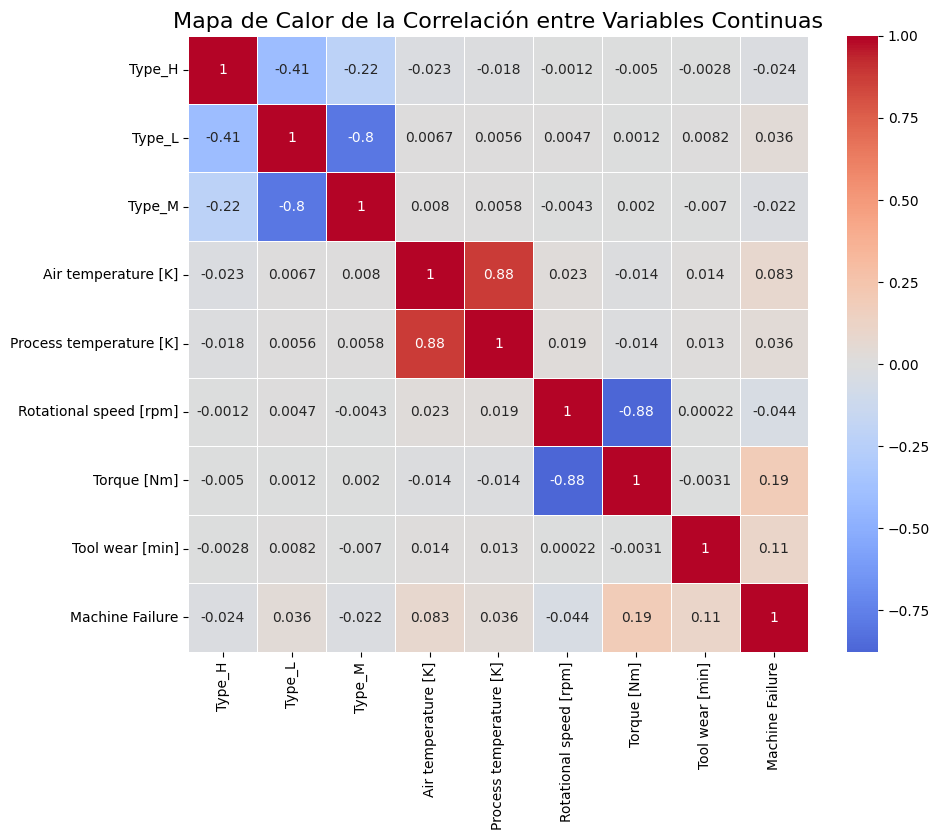

In [8]:
# Intentar convertir todas las columnas posibles a numéricas y reemplazar errores con NaN
base_numeric = base.apply(pd.to_numeric, errors='coerce')

# Calcular la matriz de correlación con las columnas numéricas
correlation_matrix = base_numeric.corr()

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='white')

# Título del mapa de calor
plt.title('Mapa de Calor de la Correlación entre Variables Continuas', fontsize=16, color='black')
plt.show()

In [9]:
# Guardar el DataFrame concatenado en un archivo Excel
base.to_csv('PREPARACION_DATOS.csv', index=False)